#  XPCS   Pipeline 

 "This notebook corresponds to version {{ version }} of the pipeline tool: https://github.com/NSLS-II/pipelines"

## NSLS2 data retrieval imports

In [1]:
import sys, shutil
EssCod_PATH='/home/yuzhang/chx-pipelines/Develops/'
EssCod_PATH in sys.path or sys.path.append(EssCod_PATH)
from develop import * 

/opt/conda_envs/analysis/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
cd /home/yuzhang/chx-pipelines/Develops/

/home/yuzhang/chx-pipelines/Develops


In [3]:

%matplotlib notebook

### Lazy Eiger Handler (later will goto databroker)

### Get the events from the uid

In [4]:
uid = 'c423e856'

uid = '528bd8'
uid = '54614d43'
uid = '95782687'
uid= 'fa5fdae'

uid = 'ff9f20c0'
uid='71720966'
uid = '377dad97' # Deposition at 6 mTorr
#uid = 'bece0b55' # Presputter for 6 mTorr
uid = '4d82cc38'  # 10 mTorr 0.2 fps 2500 frames
uid = 'ffe9d518'  # 10 mTorr 0.2 fps 2500 frames
hdr = db[uid]

In [5]:
#hdr
import uuid
print(str(uuid.uuid4()))

5031b5f8-e3ca-493b-aa0d-218d872cd677


In [10]:
ev, = get_events(hdr, ['eiger_4M_cam_img_image_lightfield'], fill = True)

hdf5 path = /XF11ID/data/2015/11/8/3f84f57d-79b7-4a10-8b51_5_master.h5


In [11]:

dt = datetime.fromtimestamp(hdr['start'].time)
path ='/XF11ID/analysis' + '/%s/%s/%s/' % (dt.year, dt.month, dt.day)
path

'/XF11ID/analysis/2015/11/8/'

In [12]:
imgs = ev['data']['eiger_4M_cam_img_image_lightfield']
print (imgs)
Nimg=len(imgs)

<Frames>
Length: 15000 frames
Frame Shape: 2167 x 2070
Pixel Datatype: uint32


## load a mask if exist 
### otherwise create a mask using Mask pipeline

In [13]:

mask = np.load( path +  str(uid)+"_mask.npy")
 

### Plot the mask

<IPython.core.display.Javascript object>


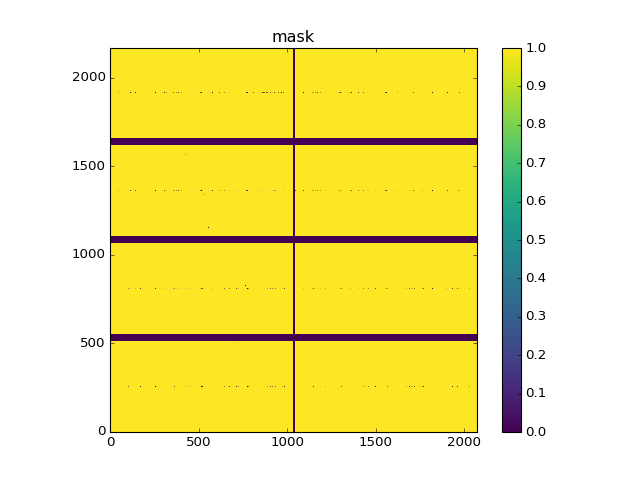

In [14]:
fig, ax = plt.subplots()
im = ax.imshow(mask, vmin=0,vmax=1,cmap='viridis', origin='lower')
ax.set_title( 'mask')
fig.colorbar( im )
plt.show()

# inverse the image coordinate

In [15]:
imgsr = Reverse_Coordinate(imgs, mask)    
#don't use imgsr[::1] , this command will load everything to the memory
 

In [16]:
imgsr[2499].max()

17255

## Interactive way to browse through images.

### Note : Provide the number of images that you want to browse

In [17]:
#interact(view_image, i=(0, Nimg-1))

In [18]:
#view_image_movie( imgsr,.1, 1000, 1001) 

### hey, let's see if any images are bad!

### Get the Averaged Image Data

In [19]:
good_start = 0
good_end= 2499

avg_img = np.average( imgs[good_start:good_end: 100], axis=0) #*imgs.md['pixel_mask']  #*mask_rh

avg_img *=  mask

In [20]:
#avg_img = average_img( imgsr,0, 2000 )

In [21]:
avg_img  = avg_img[::-1,:] 

<IPython.core.display.Javascript object>


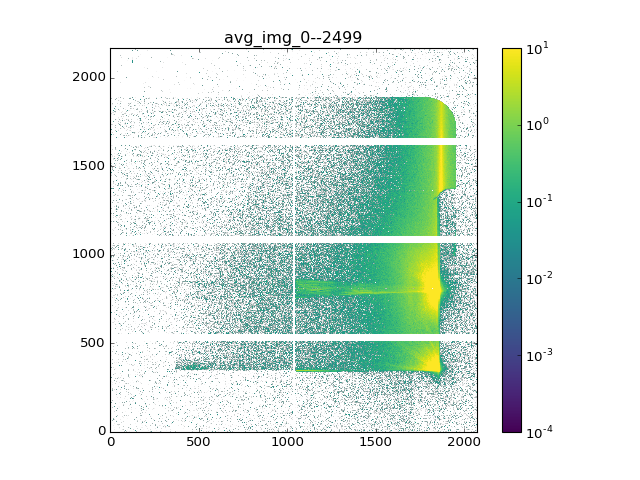

In [22]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(avg_img, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=1E1))
fig.colorbar(im)
ax.set_title( 'avg_img_%s--%s'%(good_start, good_end))
plt.show()

## Plot the averged image with the mask

In [26]:
print (avg_img.max())

10658.24


## Note:  experiment information 

* The physical size of the pixels
* Wavelegth of the X-rays  - (units in Angstroms)
* Detector to sample distance
* Exposure time - (units in seconds)
* acqusition period - (units in seconds)
* dead time - (units in seconds)
* time per frame = (exposure time + dead_time or acqusition period) - (units in seconds)

In [27]:
#imgs.md

In [28]:
# The physical size of the pixels
dpix = imgs.md['x_pixel_size'] * 1000.  
lambda_ = imgs.md['incident_wavelength']    # wavelegth of the X-rays in Angstroms
Ldet = 4810        # detector to sample distance (mm)

exposuretime= imgs.md['count_time']
acquisition_period = imgs.md['frame_time']

# deadtime= 0   # 60e-6 
# timeperframe = exposuretime + deadtime
timeperframe = acquisition_period  

timeperframe, exposuretime

(1.00001, 1.0)

## Import all the required packages for  Data Analysis

* scikit-xray - data analysis tools for X-ray science 
    - https://github.com/scikit-xray/scikit-xray
* xray-vision - plotting helper functions for X-ray science
    - https://github.com/Nikea/xray-vision


## Get the approximate center and see the statistic to make sure 

### Qz, Qr Average : to do!

# GiSAXS get q-map (qz and qr)

In [29]:
inc_x0 = 1871
inc_y0 = 339
refl_x0 = 1871
refl_y0 = 811      #1670
Lsd= 4.81
lamda= lambda_  #12.4/9

In [30]:
lamda

1.3776

In [31]:
#cd /home/yuzhang/chx-pipelines/Develops/

In [32]:
#%run develop.py

In [33]:
alphaf,thetaf, alphai, phi = get_reflected_angles( inc_x0, inc_y0,refl_x0 , refl_y0, Lsd=Lsd )

The incident_angle (alphai) is: 0.210835132612


In [34]:
qx, qy, qr, qz = convert_gisaxs_pixel_to_q( inc_x0, inc_y0,refl_x0,refl_y0, lamda=lamda, Lsd=Lsd )

The incident_angle (alphai) is: 0.210835132612


<IPython.core.display.Javascript object>


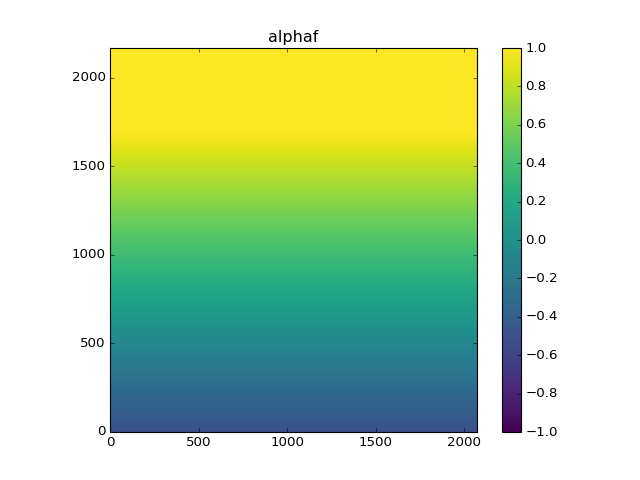

In [35]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(alphaf*180/np.pi, origin='lower' ,cmap='viridis',vmin=-1,vmax= 1 )
fig.colorbar(im)
ax.set_title( 'alphaf')
plt.show()

<IPython.core.display.Javascript object>


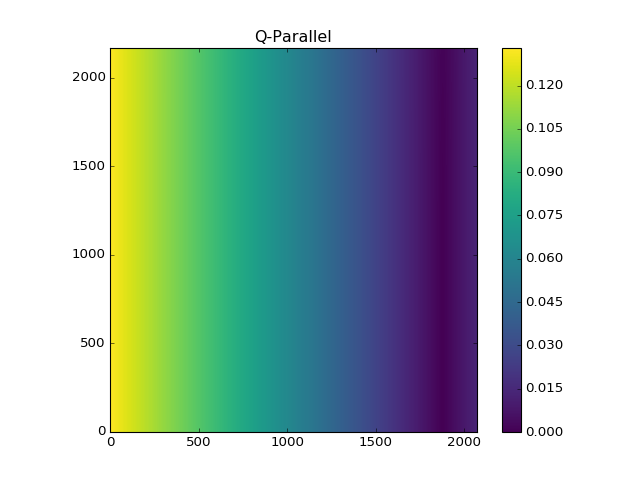

In [36]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(qr, origin='lower' ,cmap='viridis',vmin=qr.min(),vmax= qr.max() )
fig.colorbar(im)
ax.set_title( 'Q-Parallel')
plt.show()

<IPython.core.display.Javascript object>


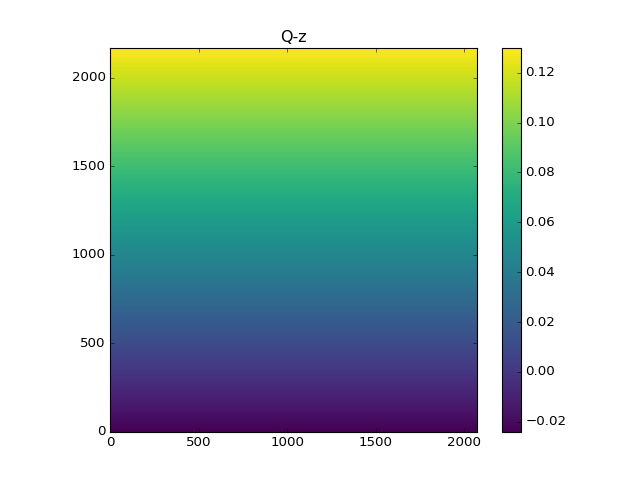

In [37]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(qz, origin='lower' ,cmap='viridis',vmin=qz.min(),vmax= qz.max() )
fig.colorbar(im)
ax.set_title( 'Q-z')
plt.show()

# get GiSAXS label array

<IPython.core.display.Javascript object>


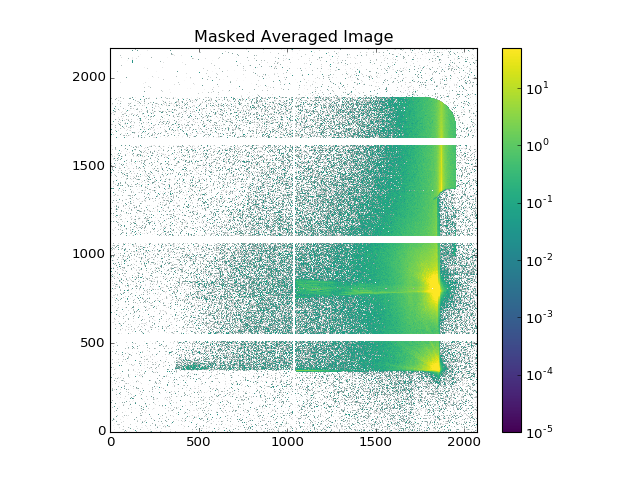

In [38]:
fig, ax = plt.subplots()
im = ax.imshow(avg_img, cmap='viridis', origin = 'lower',  norm= LogNorm( vmin=0.00001, vmax=.5e2 ) )
ax.set_title("Masked Averaged Image")
fig.colorbar(im)
plt.show()

# Get q||-intensity

In [42]:
#bin_img = 500
#Nbin = int( len(imgs)/bin_img )
#[ (i*bin_img, (i+1)*bin_img) for i in range(Nbin)               ]
#ave_img_series =  [   average_img( imgsr,i, i*bin_img )    for i in range(Nbin)                ]

In [40]:
vert_rect = ( ( 850, 0, 980- 850, 1600-0) , ( 570, 0, 700- 570, 1600-0) )    #(y,x, hight, wdith)

<IPython.core.display.Javascript object>


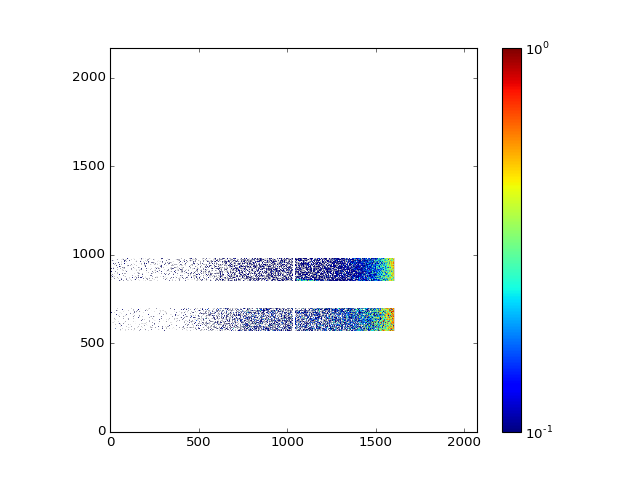

<IPython.core.display.Javascript object>


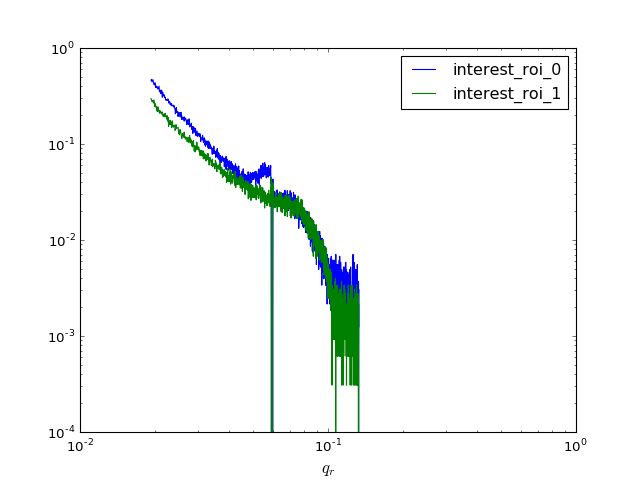

0 (850, 0, 130, 1600)
1 (570, 0, 130, 1600)


In [41]:
get_qr_intensity( qr, avg_img, vert_rect, show_roi=True)

In [44]:
qz_start = qz[670,0]
qz_end = qz[950,0]
qz_num= 2


qr_start =  qr[600,1700]
qr_end = qr[600,0]
qr_num = 2

In [45]:
qr_edge, qr_center = get_qedge(qr_start , qr_end, ( qr_end- qr_start)/qr_num, qr_num )

In [46]:
qz_edge, qz_center = get_qedge( qz_start,   qz_end,   (qz_end - qz_start)/(qz_num -0) , qz_num )

In [47]:
label_array_qz = get_qmap_label( qz, qz_edge)
label_array_qr = get_qmap_label( qr, qr_edge)
label_array_qzr,qzc,qrc = get_qzrmap(label_array_qz, label_array_qr,qz_center, qr_center  )

In [48]:
labels_qzr, indices_qzr = roi.extract_label_indices( label_array_qzr  )
labels_qz, indices_qz = roi.extract_label_indices( label_array_qz  )
labels_qr, indices_qr = roi.extract_label_indices( label_array_qr  )

In [49]:
num_qz = len(np.unique( labels_qz ))
num_qr = len(np.unique( labels_qr ))
num_qzr = len(np.unique( labels_qzr ))

In [50]:
num_qz,num_qr,num_qzr


(2, 2, 4)

<IPython.core.display.Javascript object>


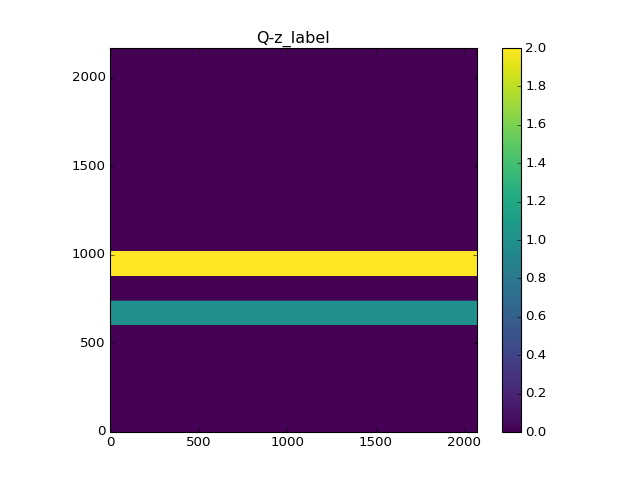

In [51]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(label_array_qz, origin='lower' ,cmap='viridis',vmin=0,vmax= None )
fig.colorbar(im)
ax.set_title( 'Q-z_label')
plt.show()

<IPython.core.display.Javascript object>


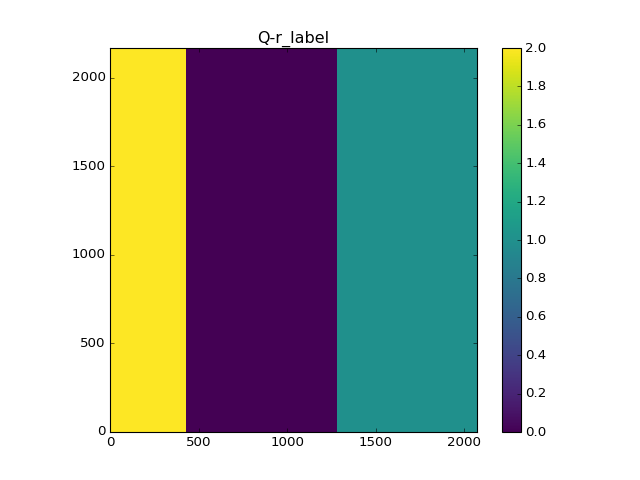

In [52]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(label_array_qr, origin='lower' ,cmap='viridis',vmin=0,vmax= None )
fig.colorbar(im)
ax.set_title( 'Q-r_label')
plt.show()

<IPython.core.display.Javascript object>


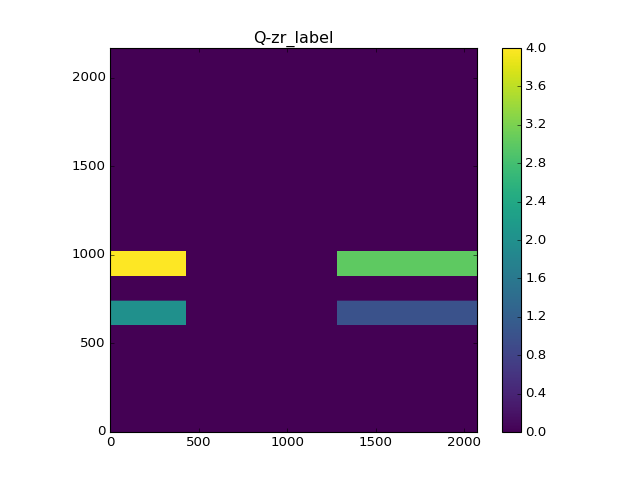

In [53]:
if True:
    fig, ax = plt.subplots()
    #im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
    im=ax.imshow(label_array_qzr, origin='lower' ,cmap='viridis',vmin=0,vmax= None )
    fig.colorbar(im)
    ax.set_title( 'Q-zr_label')
    plt.show()

In [54]:
boxes = label_array_qzr 
box_mask = boxes*mask
labels, indices = roi.extract_label_indices(box_mask)

## Number of pixels in each q ring

In [55]:
#ring_mask

In [56]:
nopr = np.bincount( np.array(labels, dtype=int) )[1:]
nopr

array([110366,  59214, 111953,  60066])

# check one_qz_qr_region

In [57]:
#%run develop.py

<IPython.core.display.Javascript object>


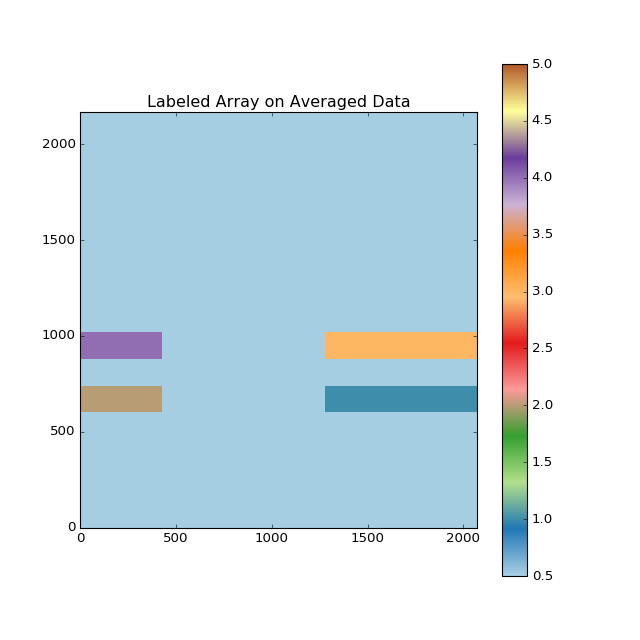

In [58]:

# plot the figure
fig, axes = plt.subplots(figsize=(8,8))
axes.set_title("Labeled Array on Averaged Data")
im,im_label = show_label_array_on_image(axes, avg_img, box_mask, imshow_cmap='viridis',
                        cmap='Paired',
                         vmin=0.01, vmax=5.0 ,  origin="lower")
#rwidth = 200 
#x1,x2 = [center[1] - rwidth, center[1] + rwidth]
#y1,y2 = [center[0] - rwidth, center[0] + rwidth]
#axes.set_xlim( [x1,x2])
#axes.set_ylim( [y1,y2])

#fig.colorbar(im)
fig.colorbar(im_label)
plt.show()

##  Kymograph(waterfall plot) of the box

In [59]:
#kymo = roi.kymograph(imgsr[::100], box_mask, num = 1)

In [60]:
if False:
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_ylabel('Pixel')
    ax.set_xlabel('Frame')
    ax.set_title('Kymograph')

    im = ax.imshow(kymo.T, cmap='viridis', vmax=10)
    #fig.colorbar( im   )
    ax.set_aspect(0.002)
    plt.show()

##  Mean intensities for each interested qz_qr

In [ ]:
#imgsr = Reverse_Coordinate(imgs, mask)    
#masker = Masker( imgsr, mask)

In [ ]:
def mean_intensity(images, labeled_array, index=None):
    import scipy.ndimage.measurements as ndim
    """Compute the mean intensity for each ROI in the image list

    Parameters
    ----------
    images : list
        List of images
    labeled_array : array
        labeled array; 0 is background.
        Each ROI is represented by a nonzero integer. It is not required that
        the ROI labels are contiguous
    index : int, list, optional
        The ROI's to use. If None, this function will extract averages for all
        ROIs

    Returns
    -------
    mean_intensity : array
        The mean intensity of each ROI for all `images`
        Dimensions:
            len(mean_intensity) == len(index)
            len(mean_intensity[0]) == len(images)
    index : list
        The labels for each element of the `mean_intensity` list
    """
    if labeled_array.shape != images[0].shape[0:]:
        raise ValueError(
            "`images` shape (%s) needs to be equal to the labeled_array shape"
            "(%s)" % (images[0].shape, labeled_array.shape))
    # handle various input for `index`
    if index is None:
        index = list(np.unique(labeled_array))
        index.remove(0)
    try:
        len(index)
    except TypeError:
        index = [index]
    # pre-allocate an array for performance
    # might be able to use list comprehension to make this faster
    #mean_intensity = np.zeros((images.shape[0], len(index)))
    mean_intensity = np.zeros(( len(images), len(index)))
    for n, img in enumerate(images):
        # use a mean that is mask-aware
        mean_intensity[n] = ndim.mean(img, labeled_array, index=index)
    return mean_intensity, index

In [ ]:

imgsr = Reverse_Coordinate(imgs, mask)  
imgsr

In [ ]:
Nm=10000

start_time = time.time()
mask_data = imgsr[::Nm]  #make  masker[::1] will be very slow!
mean_int_sets, index_list = roi.mean_intensity(mask_data, box_mask)
elapsed_time = time.time() - start_time
print ('Total time: %.2f min' %(elapsed_time/60.))

In [ ]:
if True:
    times = np.arange( len(mean_int_sets)  )*Nm  # get the time for each frame

    print (times.shape, mean_int_sets[:,1].shape)
    #%matplotlib inline
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title("Mean intensity of each Qzr")
    for i in range(num_qzr):
        ax.plot(times, mean_int_sets[:,i], label="Qzr "+str(i+1))
        ax.set_xlabel("Frames")
        ax.set_ylabel("Mean Intensity")
        ax.set_yscale('log')
    ax.legend(fontsize=18) 
    plt.show()

## One time Correlation

Note : Enter the number of levels and number of buffers for Muliti tau one time correlation
number of buffers has to be even. More details in https://github.com/scikit-xray/scikit-xray/blob/master/skxray/core/correlation.py

In [ ]:
#ring_mask = np.array( ring_mask, dtype=int)

In [ ]:
good_start = 0
good_end = 100 #2499
#good_end = 6500

In [ ]:
imgs_ =imgs[good_start: good_end-1]

In [ ]:
imgsr2 = Reverse_Coordinate(imgs_, mask)    

In [ ]:
num_lev = 9  
num_buf = 8

g2, lag_steps = corr.multi_tau_auto_corr(num_lev, num_buf,  ring_mask, imgsr2)

In [ ]:
lags = lag_steps*timeperframe

In [ ]:
lag_steps

In [ ]:
g2.shape

In [ ]:
lag_steps.shape

In [ ]:
np.save( path + 'g2_%s-%s--%s'%(uid,good_start, good_end), g2)

In [ ]:
num_qr, num_qz, num_qzr

### Plot the one time correlation functions

In [ ]:

for qz_ind in range(num_qz):
    fig = plt.figure(figsize=(10, 8))
    title_qz = ' Qz= %.5f  '%( qz_center[qz_ind]) + r'$\AA^{-1}$' 
    plt.title('uid= %s:--->'%uid + title_qz,fontsize=20, y =1.1) 
    #print (qz_ind,title_qz)
    plt.axis('off')
    sx = int(round(np.sqrt(num_qr)) )
    if num_qr%sx == 0: 
        sy = int(num_qr/sx)
    else:
        sy=int(num_qr/sx+1) 
    for sn in range(num_qr):
        ax = fig.add_subplot(sx,sy,sn+1 )
        ax.set_ylabel("g2") 
        ax.set_title(" Qr= " + '%.5f  '%( qr_center[sn]) + r'$\AA^{-1}$')
        y=g2[:, sn + qz_ind * num_qr]
        ax.semilogx(lags, y, '-o', markersize=6) 
        ax.set_ylim([min(y)*.95, max(y[1:])*1.05 ])
    plt.show()
    fig.tight_layout()  


#np.save( path + 'g2_%s--%s'%(good_start, good_end), [lags,g2])
#lags,g2 = np.load( path + 'g2_%s--%s.npy'%(good_start, good_end) )

    

# Two time correlation

In [ ]:
#%run develop.py

In [62]:
t0 = time.time()
def run_time(t0):
    elapsed_time = time.time() - t0
    print ('Total time: %.2f min' %(elapsed_time/60.))   
  

In [63]:
t0 = time.time()
#data = imgsr[::100]
run_time( t0 )

Total time: 0.00 min


In [ ]:
data.shape


In [ ]:
#dly = delays( num_lev=3, num_buf=4, time = 1  )

In [ ]:
#from two_time import *


In [94]:
good_start= 0
good_end = 100
imgs_ =imgs[good_start: good_end-1]
imgsr = Reverse_Coordinate(imgs_, mask) 

In [95]:
imgs_ =imgs[good_start: good_end-1]

In [96]:
imgsr = Reverse_Coordinate(imgs_, mask)    

In [97]:
%run develop.py
%run two_time.py

# A test of g12 calculation speed

In [73]:
def get_box_mask( qr_num):
    qz_start = qz[670,0]
    qz_end = qz[950,0]
    qz_num= 2

    qr_start =  qr[600,1700]
    qr_end = qr[600,0]
    qr_num = qr_num
    print ('The total q-num is: %s'%(qr_num*qz_num))

    qr_edge, qr_center = get_qedge(qr_start , qr_end, ( qr_end- qr_start)/qr_num, qr_num )
    qz_edge, qz_center = get_qedge( qz_start,   qz_end,   (qz_end - qz_start)/(qz_num -0) , qz_num )
    label_array_qz = get_qmap_label( qz, qz_edge)
    label_array_qr = get_qmap_label( qr, qr_edge)
    label_array_qzr,qzc,qrc = get_qzrmap(label_array_qz, label_array_qr,qz_center, qr_center  )
    boxes_mask = label_array_qzr *mask
    return boxes_mask



### for buf=2,  as a function of noqs from 2 to 196

In [100]:
num_buf =2
qs = range(2,100,6)
tms=[]
for qr_num in qs:
    g12,tm = autocor_two_time( num_buf=num_buf,  ring_mask=get_box_mask(qr_num),
                       imgs = imgsr,  start_img= 0, end_img= None  )
    tms.append(tm)
    

The total q-num is: 4
The lev number is 8
##########Total time: 0.13 min
The total q-num is: 16
The lev number is 8
##########Total time: 0.18 min
The total q-num is: 28
The lev number is 8
##########Total time: 0.18 min
The total q-num is: 40
The lev number is 8
##########Total time: 0.19 min
The total q-num is: 52
The lev number is 8
##########Total time: 0.19 min
The total q-num is: 64
The lev number is 8
##########Total time: 0.19 min
The total q-num is: 76
The lev number is 8
##########Total time: 0.19 min
The total q-num is: 88
The lev number is 8
##########Total time: 0.19 min
The total q-num is: 100
The lev number is 8
##########Total time: 0.19 min
The total q-num is: 112
The lev number is 8
##########Total time: 0.20 min
The total q-num is: 124
The lev number is 8
##########Total time: 0.19 min
The total q-num is: 136
The lev number is 8
##########Total time: 0.20 min
The total q-num is: 148
The lev number is 8
##########Total time: 0.20 min
The total q-num is: 160
The lev nu

In [101]:
tms

[0.13093440135320028,
 0.17998536427815756,
 0.18342777093251547,
 0.18584118286768594,
 0.1860461433728536,
 0.19088710149129232,
 0.19192461570103964,
 0.19272053639094036,
 0.19372636477152508,
 0.19514618317286173,
 0.19490898847579957,
 0.19726393620173135,
 0.1957791248957316,
 0.19785298109054567,
 0.19747522274653118,
 0.20227790673573812,
 0.1997849901517232]

In [106]:
qs = range(2,100,6)

In [110]:
tms =[0.13093440135320028,
 0.17998536427815756,
 0.18342777093251547,
 0.18584118286768594,
 0.1860461433728536,
 0.19088710149129232,
 0.19192461570103964,
 0.19272053639094036,
 0.19372636477152508,
 0.19514618317286173,
 0.19490898847579957,
 0.19726393620173135,
 0.1957791248957316,
 0.19785298109054567,
 0.19747522274653118,
 0.20227790673573812,
 0.1997849901517232]

<IPython.core.display.Javascript object>


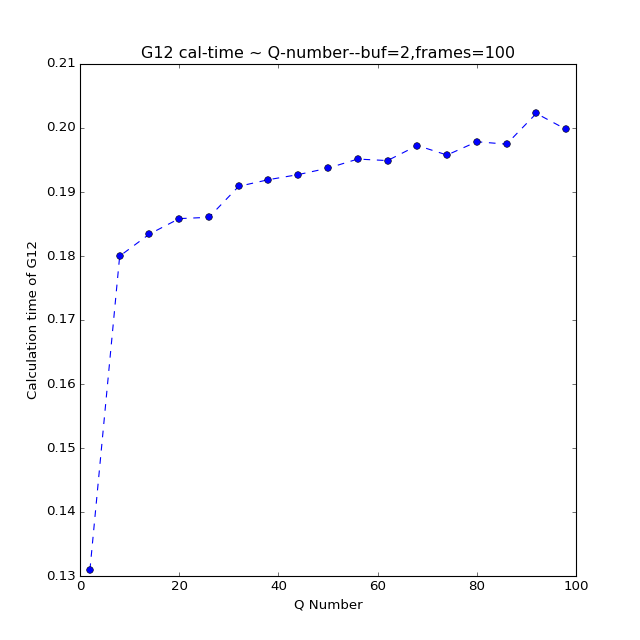

In [111]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("G12 cal-time ~ Q-number--buf=2,frames=100")
ax.plot(qs, tms, '--bo')
ax.set_xlabel("Q Number")
ax.set_ylabel("Calculation time of G12")
plt.show()

### for noqs=36,  as a function of buf number from 2 to 100

In [ ]:
qr_num = 18
tms2=[] 
bufs = range(2,100,6)
tms=[]
for num_buf in bufs:
    g12,tm = autocor_two_time( num_buf=num_buf,  ring_mask=get_box_mask(qr_num),
                       imgs = imgsr,  start_img= 0, end_img= None  )
    tms2.append(tm)
    

The total q-num is: 36
The lev number is 8
##########Total time: 0.19 min
The total q-num is: 36
The lev number is 5
##########Total time: 0.59 min
The total q-num is: 36
The lev number is 4
##########Total time: 0.93 min
The total q-num is: 36
The lev number is 4
##########Total time: 1.23 min
The total q-num is: 36
The lev number is 4
##########Total time: 1.48 min
The total q-num is: 36
The lev number is 3
##########Total time: 1.70 min
The total q-num is: 36
The lev number is 3
##########Total time: 1.89 min
The total q-num is: 36
The lev number is 3
##########Total time: 2.06 min
The total q-num is: 36
The lev number is 3
########

<IPython.core.display.Javascript object>


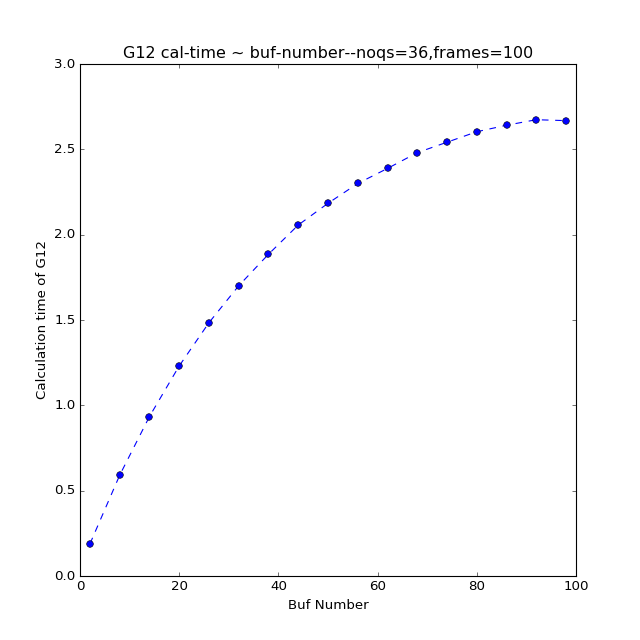

In [113]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("G12 cal-time ~ buf-number--noqs=36,frames=100")
ax.plot(bufs, tms2, '--bo')
ax.set_xlabel("Buf Number")
ax.set_ylabel("Calculation time of G12")
plt.show()

In [ ]:
%run two_time.py

In [ ]:
##1000 frames, buf =2, as a function of q-number

In [115]:
num_buf =2
qs = range(2,100,6)
tms3=[]
for qr_num in qs:
    #reload data
    good_start= 0
    good_end = 1000
    imgs_ =imgs[good_start: good_end-1]
    imgsr = Reverse_Coordinate(imgs_, mask)
    #do  calculation
    g12,tm = autocor_two_time( num_buf=num_buf,  ring_mask=get_box_mask(qr_num),
                       imgs = imgsr,  start_img= 0, end_img= None  )
    tms3.append(tm)
    

The total q-num is: 4
The lev number is 11
##########Total time: 1.33 min
The total q-num is: 16
The lev number is 11
##########Total time: 1.85 min
The total q-num is: 28
The lev number is 11
##########Total time: 1.89 min
The total q-num is: 40
The lev number is 11
##########Total time: 1.92 min
The total q-num is: 52
The lev number is 11
##########Total time: 1.93 min
The total q-num is: 64
The lev number is 11
##########Total time: 1.97 min
The total q-num is: 76
The lev number is 11
##########Total time: 1.98 min
The total q-num is: 88
The lev number is 11
##########Total time: 2.02 min
The total q-num is: 100
The lev number is 11
##########Total time: 2.03 min
The total q-num is: 112
The lev number is 11
##########Total time: 2.06 min
The total q-num is: 124
The lev number is 11
##########Total time: 2.06 min
The total q-num is: 136
The lev number is 11
##########Total time: 2.08 min
The total q-num is: 148
The lev number is 11
##########Total time: 2.10 min
The total q-num is: 1

<IPython.core.display.Javascript object>


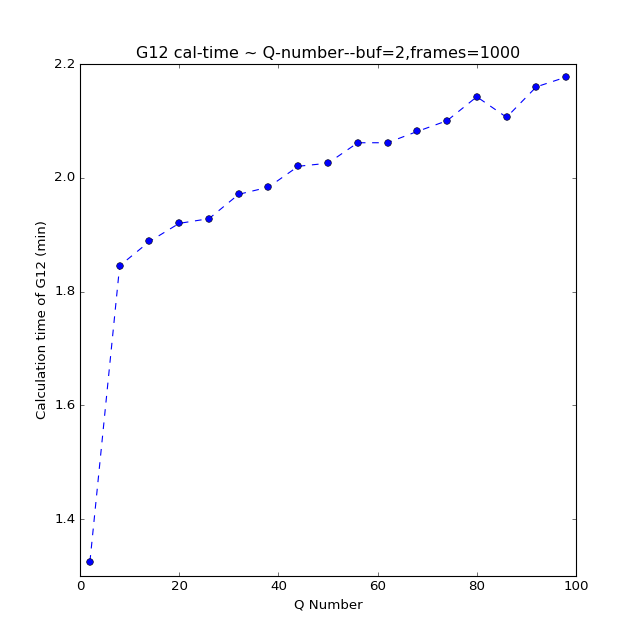

In [118]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("G12 cal-time ~ Q-number--buf=2,frames=1000")
ax.plot(qs, tms3, '--bo')
ax.set_xlabel("Q Number")
ax.set_ylabel("Calculation time of G12 (min)")
plt.show()

# 2500 frames, buf=8, lev=8, as function of q

In [125]:
%run two_time.py

In [ ]:
num_buf =8
num_lev = 8
qs = range(2,100,12)
tms4=[]
for qr_num in qs:
    #reload data
    good_start= 0
    good_end = 2500
    imgs_ =imgs[good_start: good_end-1]
    imgsr = Reverse_Coordinate(imgs_, mask)
    #do  calculation
    g12,tm = autocor_two_time( num_buf=num_buf,  num_lev=num_lev, ring_mask=get_box_mask(qr_num),
                       imgs = imgsr,  start_img= 0, end_img= None  )
    tms4.append(tm)

The total q-num is: 4
The lev number is 8
#

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("G12 cal-time ~ Q-number--buf=8,lev=8,frames=2500")
ax.plot(qs, tms3, '--bo')
ax.set_xlabel("Q Number")
ax.set_ylabel("Calculation time of G12 (min)")
plt.show()

In [122]:
dly = delays(8,8)

In [119]:
delays?

In [123]:
dly

array([  0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
         3.00000000e+00,   4.00000000e+00,   5.00000000e+00,
         6.00000000e+00,   7.00000000e+00,   8.00000000e+00,
         1.00000000e+01,   1.20000000e+01,   1.40000000e+01,
         1.60000000e+01,   2.00000000e+01,   2.40000000e+01,
         2.80000000e+01,   3.20000000e+01,   4.00000000e+01,
         4.80000000e+01,   5.60000000e+01,   6.40000000e+01,
         8.00000000e+01,   9.60000000e+01,   1.12000000e+02,
         1.28000000e+02,   1.60000000e+02,   1.92000000e+02,
         2.24000000e+02,   2.56000000e+02,   3.20000000e+02,
         3.84000000e+02,   4.48000000e+02,   5.12000000e+02,
         6.40000000e+02,   7.68000000e+02,   8.96000000e+02,
         1.02400000e+03])

In [84]:
g12,tm = autocor_two_time( num_buf= 30,  ring_mask=get_box_mask(18),
                       imgs = imgsr,  start_img= 0, end_img= None  )

3
120.0
##########Total time: 1.63 min


In [ ]:
g12,tm = autocor_two_time( num_buf= 2,  ring_mask=get_box_mask(18),
                       imgs = imgsr,  start_img= 0, end_img= None  )

In [83]:
g12,tm = autocor_two_time( num_buf= 30,  ring_mask=get_box_mask(18),
                       imgs = imgs[0:100],  start_img= 0, end_img= None  )

3
120.0
#Total time: 1.70 min


In [88]:
g12,tm = autocor_two_time( num_buf= 30,  ring_mask=get_box_mask(18),
                       imgs = data,  start_img= 0, end_img= None  )

3
120.0
##########Total time: 1.57 min


In [89]:
good_start= 0
good_end = 1000
imgs_ =imgs[good_start: good_end-1]
imgsr = Reverse_Coordinate(imgs_, mask) 

In [90]:
g12,tm = autocor_two_time( num_buf= 30,  ring_mask=get_box_mask(18),
                       imgs = imgsr,  start_img= 0, end_img= None  )

7
1920.0
##########Total time: 22.97 min


In [91]:
g12,tm = autocor_two_time( num_buf= 30,  ring_mask=get_box_mask(18),
                       imgs = imgs_,  start_img= 0, end_img= None  )

7
1920.0
##########Total time: 22.78 min


In [92]:
t0 = time.time()
#data = imgsr[::100]
data = imgsr[::1]
run_time( t0 )

Total time: 1.10 min


In [93]:
g12,tm = autocor_two_time( num_buf= 30,  ring_mask=get_box_mask(18),
                       imgs = data,  start_img= 0, end_img= None  )

7
1920.0
##########Total time: 22.70 min


In [86]:
t0 = time.time()
#data = imgsr[::100]
data = imgsr[::1]
run_time( t0 )

Total time: 0.11 min


In [87]:
data.shape

(99, 2167, 2070)

In [ ]:
data[0]

In [82]:
imgs[0:100]

Sliced and/or processed FixedEigerImages. Original repr:
    <Frames>
    Length: 15000 frames
    Frame Shape: 2167 x 2070
    Pixel Datatype: uint32

In [ ]:
g12,tm = autocor_two_time(num_lev=1, num_buf= 50,  ring_mask=get_box_mask(18),
                       imgs = imgsr,  start_img= 0, end_img= None  )

In [ ]:
num_buf=  4

In [ ]:
qs = range(2,100,6)

In [ ]:
qs

In [ ]:
g12 = autocor_two_time(num_lev=10, num_buf= num_buf,  ring_mask=box_mask,
                       imgs = imgsr,  start_img= 0, end_img= None  )
#np.save( path + 'g12_%s_%s_%s--buf=%s'%(uid ,good_start, good_end, num_buf), g12)

# for buf=4, noqs = 36

In [ ]:
qz_start = qz[670,0]
qz_end = qz[950,0]
qz_num= 2

qr_start =  qr[600,1700]
qr_end = qr[600,0]
qr_num = 18

qr_edge, qr_center = get_qedge(qr_start , qr_end, ( qr_end- qr_start)/qr_num, qr_num )
qz_edge, qz_center = get_qedge( qz_start,   qz_end,   (qz_end - qz_start)/(qz_num -0) , qz_num )
label_array_qz = get_qmap_label( qz, qz_edge)
label_array_qr = get_qmap_label( qr, qr_edge)
label_array_qzr,qzc,qrc = get_qzrmap(label_array_qz, label_array_qr,qz_center, qr_center  )
boxes_mask = label_array_qzr *mask

In [ ]:
g12 = autocor_two_time(num_lev=10, num_buf= num_buf,  ring_mask=box_mask,
                       imgs = imgs_,  start_img= 0, end_img= None  )
#np.save( path + 'g12_%s_%s_%s--buf=%s'%(uid ,good_start, good_end, num_buf), g12)

# for buf=20, noqs = 36

In [ ]:
num_buf=  20

In [ ]:
qz_start = qz[670,0]
qz_end = qz[950,0]
qz_num= 2

qr_start =  qr[600,1700]
qr_end = qr[600,0]
qr_num = 18

qr_edge, qr_center = get_qedge(qr_start , qr_end, ( qr_end- qr_start)/qr_num, qr_num )
qz_edge, qz_center = get_qedge( qz_start,   qz_end,   (qz_end - qz_start)/(qz_num -0) , qz_num )
label_array_qz = get_qmap_label( qz, qz_edge)
label_array_qr = get_qmap_label( qr, qr_edge)
label_array_qzr,qzc,qrc = get_qzrmap(label_array_qz, label_array_qr,qz_center, qr_center  )
boxes_mask = label_array_qzr *mask

In [ ]:
g12 = autocor_two_time(num_lev=10, num_buf= num_buf,  ring_mask=box_mask,
                       imgs = imgs_,  start_img= 0, end_img= None  )


In [ ]:
# for buf=20, noqs = 36

In [ ]:
nopr

In [ ]:
def interp_zeros(  data ): 
    from scipy.interpolate import interp1d
    gf = data.ravel() 
    indice, = gf.nonzero() 
    start, stop = indice[0], indice[-1]+1 
    dx,dy = data.shape 
    x=np.arange( dx*dy ) 
    f = interp1d(x[indice], gf[indice]) 
    gf[start:stop] = f(x[start:stop]) 
    return gf.reshape([dx,dy]) 
 

 

In [ ]:

#g12 = np.load( path + 'g12_%s_%s_%s--buf=%s.npy'%(uid, good_start, good_end,num_buf))

In [ ]:
N12 = 18

data = g12[:,:,N12]
data = interp_zeros( data )

fig, ax = plt.subplots()
im=ax.imshow( data, origin='lower' , cmap='viridis', 
             norm= LogNorm( vmin=1.0, vmax= 1.2 ) )
fig.colorbar(im)
plt.show()

In [ ]:
N12 = 18

fig, ax = plt.subplots()
im=ax.imshow(g12[:,:,N12], origin='lower' , cmap='viridis', 
             norm= LogNorm( vmin=1.0, vmax= 1.2 ) )
fig.colorbar(im)
plt.show()

In [342]:
%run two_time.py

In [353]:
    good_start= 0
    good_end = 1000
    imgs_ =imgs[good_start: good_end-1]
    imgsr = Reverse_Coordinate(imgs_, mask)

In [354]:
box_mask=get_box_mask(5)

The total q-num is: 10


In [355]:
qind, pixelist = roi.extract_label_indices(   box_mask  )

In [356]:
seg1 =   Get_Pixel_Array( imgsr, pixelist).get_data()

In [357]:
seg1.shape

(999, 483979)

In [358]:
g12 = autocor_arrays_two_time( seg1, pixelist,qind, seg2=None,                         
                            get_half=True,get_whole =True, up_half= True,
            print_=True,    )

##########Total time: 33.14 min


<IPython.core.display.Javascript object>


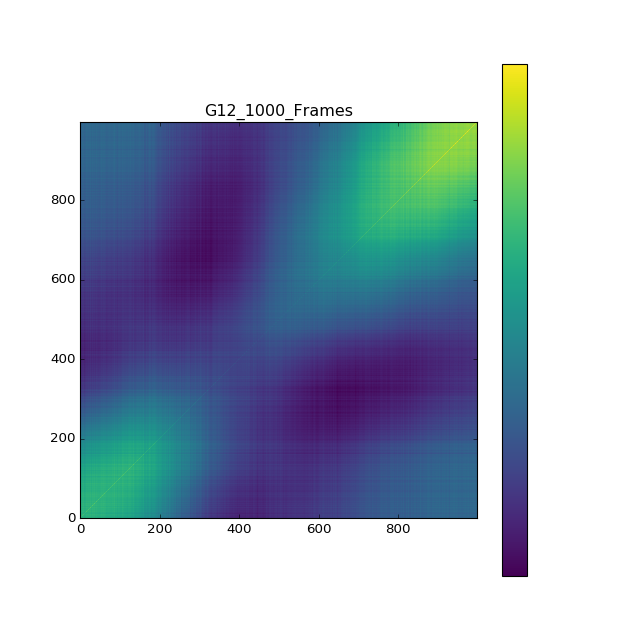

In [365]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("G12_1000_Frames")
i= 5
vmin =  g12[:,:,i].min() +.0001
vmax=g12[:,:,i].max()

im = ax.imshow(g12[:,:,i], cmap='viridis',  origin="lower",
               norm= LogNorm(vmin,vmax))
               #vmin=vmin,vmax=vmax,)
fig.colorbar(im) 
plt.show()

In [370]:
%run two_time.py

In [366]:
    good_start= 0
    good_end = 2500
    imgs_ =imgs[good_start: good_end-1]
    imgsr = Reverse_Coordinate(imgs_, mask)

In [367]:
box_mask=get_box_mask(5)
qind, pixelist = roi.extract_label_indices(   box_mask  )


The total q-num is: 10


In [368]:
seg1 =   Get_Pixel_Array( imgsr, pixelist).get_data()

In [369]:
seg1.shape

(2499, 483979)

In [371]:
g12 = autocor_arrays_two_time( seg1, pixelist,qind, seg2=None,                         
                            get_half=True,get_whole =True, up_half= True,
            print_=True,    )

#0:  cal time: 1.26 min
#1:  cal time: 3.30 min
#2:  cal time: 9.35 min
#3:  cal time: 19.39 min
#4:  cal time: 33.43 min
#5:  cal time: 51.42 min
#6:  cal time: 73.38 min
#7:  cal time: 100.12 min
#8:  cal time: 131.43 min
#9:  cal time: 167.31 min
Total time: 207.18 min


<IPython.core.display.Javascript object>


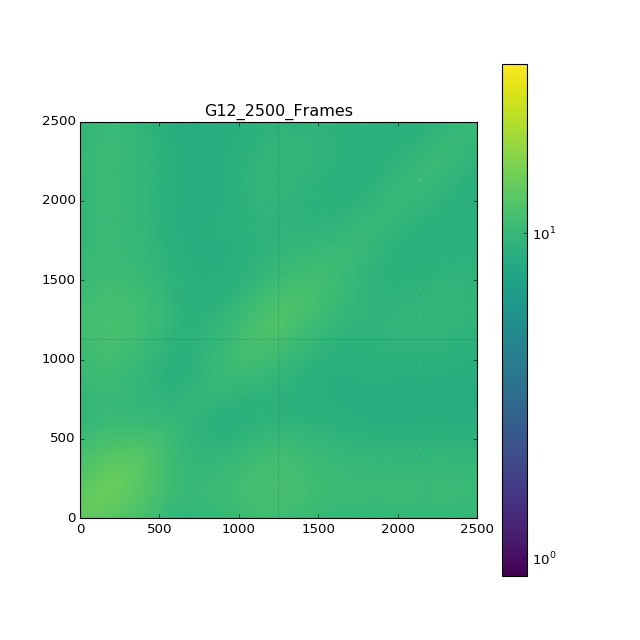

In [375]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("G12_2500_Frames")
i= 0
vmin =  g12[:,:,i].min() +.0001
vmax=g12[:,:,i].max()

im = ax.imshow(g12[:,:,i], cmap='viridis',  origin="lower",
               norm= LogNorm(vmin,vmax))
               #vmin=vmin,vmax=vmax,)
fig.colorbar(im) 
plt.show()

<IPython.core.display.Javascript object>


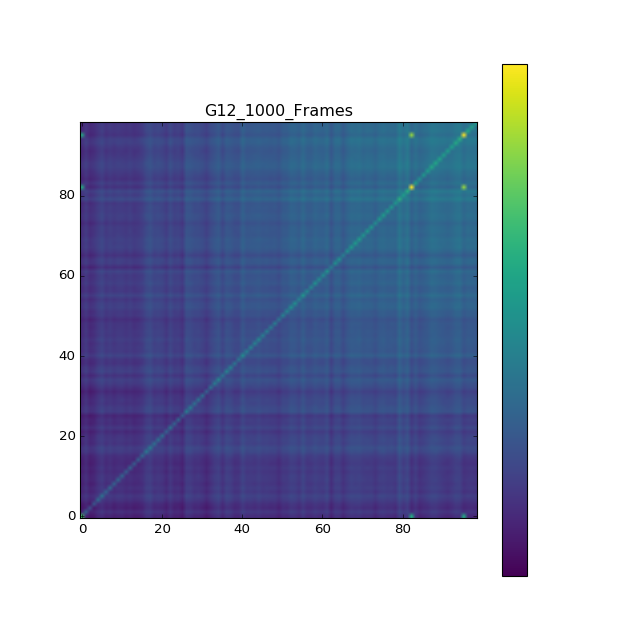

In [359]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("G12_1000_Frames")
i= 0
vmin = 13 # g12[:,:,i].min() +.0001
vmax= 16

im = ax.imshow(y1, cmap='viridis',  origin="lower",
               norm= LogNorm(vmin,vmax))
               #vmin=vmin,vmax=vmax,)
fig.colorbar(im) 
plt.show()

# For a brute-force, a mulit_tau method

In [391]:
good_start= 0
good_end = 1001
imgs_ =imgs[good_start: good_end-1]
imgsr = Reverse_Coordinate(imgs_, mask)
box_mask=get_box_mask(  15 )
qind, pixelist = roi.extract_label_indices(   box_mask  )
    
   

The total q-num is: 30


--- Logging error ---
Traceback (most recent call last):
  File "/opt/conda_envs/analysis/lib/python3.4/logging/__init__.py", line 982, in emit
    self.flush()
  File "/opt/conda_envs/analysis/lib/python3.4/logging/__init__.py", line 962, in flush
    self.stream.flush()
BrokenPipeError: [Errno 32] Broken pipe
Call stack:
  File "/opt/conda_envs/analysis/lib/python3.4/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda_envs/analysis/lib/python3.4/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda_envs/analysis/lib/python3.4/site-packages/IPython/kernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/opt/conda_envs/analysis/lib/python3.4/site-packages/traitlets/config/application.py", line 592, in launch_instance
    app.start()
  File "/opt/conda_envs/analysis/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 389, in start
    ioloop.IOLoop.instance().start()
  File "/opt/conda_envs/anal

<IPython.core.display.Javascript object>


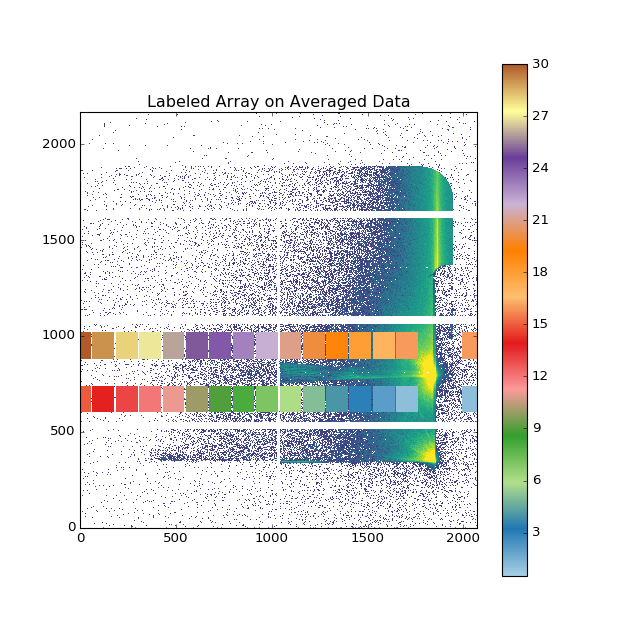

--- Logging error ---
Traceback (most recent call last):
  File "/opt/conda_envs/analysis/lib/python3.4/logging/__init__.py", line 982, in emit
    self.flush()
  File "/opt/conda_envs/analysis/lib/python3.4/logging/__init__.py", line 962, in flush
    self.stream.flush()
BrokenPipeError: [Errno 32] Broken pipe
Call stack:
  File "/opt/conda_envs/analysis/lib/python3.4/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda_envs/analysis/lib/python3.4/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda_envs/analysis/lib/python3.4/site-packages/IPython/kernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/opt/conda_envs/analysis/lib/python3.4/site-packages/traitlets/config/application.py", line 592, in launch_instance
    app.start()
  File "/opt/conda_envs/analysis/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 389, in start
    ioloop.IOLoop.instance().start()
  File "/opt/conda_envs/anal

In [395]:
if True:
    fig, axes = plt.subplots(figsize=(8,8))
    axes.set_title("Labeled Array on Averaged Data")
    im,im_label = show_label_array_on_image(axes, avg_img, box_mask, imshow_cmap='viridis',
                        cmap='Paired',   vmin=0.01, vmax=30. ,  origin="lower")

    fig.colorbar(im_label)
    plt.show()

In [393]:
num_buf = imgsr.length
g12, tms = autocor_two_time(num_lev=None, num_buf= num_buf,  ring_mask=box_mask,
                       imgs = imgsr,  start_img= 0, end_img= None  )

The lev number is 2
#Total time: 273.84 min


--- Logging error ---
Traceback (most recent call last):
  File "/opt/conda_envs/analysis/lib/python3.4/logging/__init__.py", line 982, in emit
    self.flush()
  File "/opt/conda_envs/analysis/lib/python3.4/logging/__init__.py", line 962, in flush
    self.stream.flush()
BrokenPipeError: [Errno 32] Broken pipe
Call stack:
  File "/opt/conda_envs/analysis/lib/python3.4/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda_envs/analysis/lib/python3.4/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda_envs/analysis/lib/python3.4/site-packages/IPython/kernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/opt/conda_envs/analysis/lib/python3.4/site-packages/traitlets/config/application.py", line 592, in launch_instance
    app.start()
  File "/opt/conda_envs/analysis/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 389, in start
    ioloop.IOLoop.instance().start()
  File "/opt/conda_envs/anal

--- Logging error ---
Traceback (most recent call last):
  File "/opt/conda_envs/analysis/lib/python3.4/logging/__init__.py", line 982, in emit
    self.flush()
  File "/opt/conda_envs/analysis/lib/python3.4/logging/__init__.py", line 962, in flush
    self.stream.flush()
BrokenPipeError: [Errno 32] Broken pipe
Call stack:
  File "/opt/conda_envs/analysis/lib/python3.4/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda_envs/analysis/lib/python3.4/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda_envs/analysis/lib/python3.4/site-packages/IPython/kernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/opt/conda_envs/analysis/lib/python3.4/site-packages/traitlets/config/application.py", line 592, in launch_instance
    app.start()
  File "/opt/conda_envs/analysis/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 389, in start
    ioloop.IOLoop.instance().start()
  File "/opt/conda_envs/anal

<IPython.core.display.Javascript object>


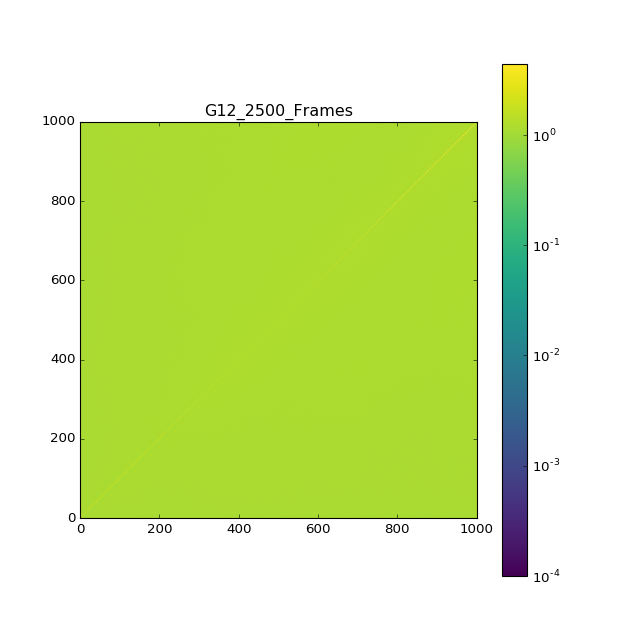

--- Logging error ---
Traceback (most recent call last):
  File "/opt/conda_envs/analysis/lib/python3.4/logging/__init__.py", line 982, in emit
    self.flush()
  File "/opt/conda_envs/analysis/lib/python3.4/logging/__init__.py", line 962, in flush
    self.stream.flush()
BrokenPipeError: [Errno 32] Broken pipe
Call stack:
  File "/opt/conda_envs/analysis/lib/python3.4/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda_envs/analysis/lib/python3.4/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda_envs/analysis/lib/python3.4/site-packages/IPython/kernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/opt/conda_envs/analysis/lib/python3.4/site-packages/traitlets/config/application.py", line 592, in launch_instance
    app.start()
  File "/opt/conda_envs/analysis/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 389, in start
    ioloop.IOLoop.instance().start()
  File "/opt/conda_envs/anal

In [394]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("G12_2500_Frames")
i= 16
vmin =  g12[:,:,i].min() +.0001
vmax=g12[:,:,i].max()

im = ax.imshow(g12[:,:,i], cmap='viridis',  origin="lower",
               norm= LogNorm(vmin,vmax))
               #vmin=vmin,vmax=vmax,)
fig.colorbar(im) 
plt.show()